In [1]:
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [10]:
df_DS_US = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].copy()

df_DS_US = df_DS_US.dropna(subset= ['salary_year_avg'])

df_DS_US['salary_year_avg'].sample(10)

364977    156500.0
56598     150000.0
755084    107665.0
721727    240000.0
156139    115000.0
348292    190000.0
664697     98325.0
375205    137500.0
228656     98496.0
648655     90000.0
Name: salary_year_avg, dtype: float64

<Axes: >

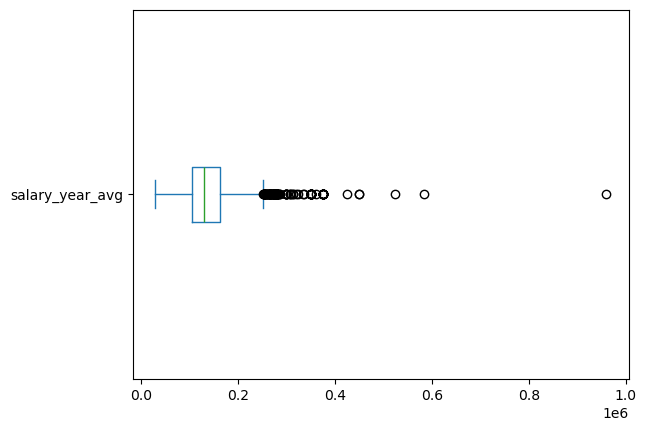

In [13]:
df_DS_US['salary_year_avg'].plot(kind='box', vert=False)

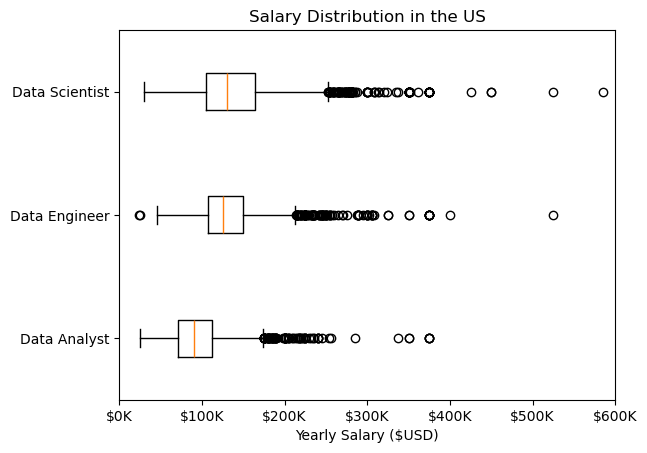

In [22]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()
